In [1]:
import pandas as pd
import os.path as op
from tqdm.contrib.itertools import product
import numpy as np
import seaborn as sns

In [2]:
def get_cvr2(subject, session, mask='npcr', bids_folder='/data/ds-risk'):
    subject = int(subject)

    fn = op.join(bids_folder, 'derivatives', 'decoded_pdfs.volume.cv_voxel_selection.denoise.retroicor', f'sub-{subject:02d}',
    'func', f'sub-{subject:02d}_ses-{session}_mask-{mask}_space-T1w_r2s.tsv')

    if op.exists(fn):
        df = pd.read_csv(fn, sep='\t', index_col=[0,1,2,3])
        df['mask'] = mask
        df = df.set_index('mask', append=True)
        return df
    else:
        return pd.DataFrame(np.zeros((0,0)))

In [3]:
subjects = list(range(2, 32))
subjects.pop(subjects.index(24))

24

In [4]:
df = []
for subject, session in product(subjects, ['3t2', '7t2']):
    d = get_cvr2(subject, session)
    d.columns.name = 'voxel'
    df.append(d.stack().to_frame('r2'))

df = pd.concat(df)

  0%|          | 0/58 [00:00<?, ?it/s]

In [5]:
prop_0 = df.groupby(['subject', 'session', 'test_run1', 'voxel']).mean().groupby(['subject', 'session', 'test_run1']).apply(lambda d: (d>0.0).mean())
sum_0 = df.groupby(['subject', 'session', 'test_run1', 'voxel']).mean().groupby(['subject', 'session', 'test_run1']).apply(lambda d: (d>0.0).sum())

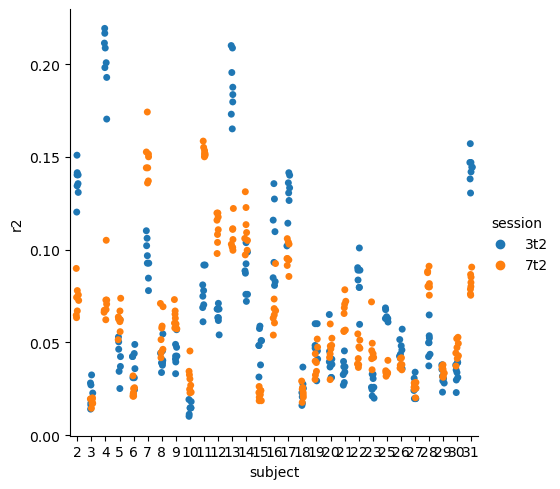

In [6]:
sns.catplot(x='subject', y='r2', hue='session', data=prop_0)

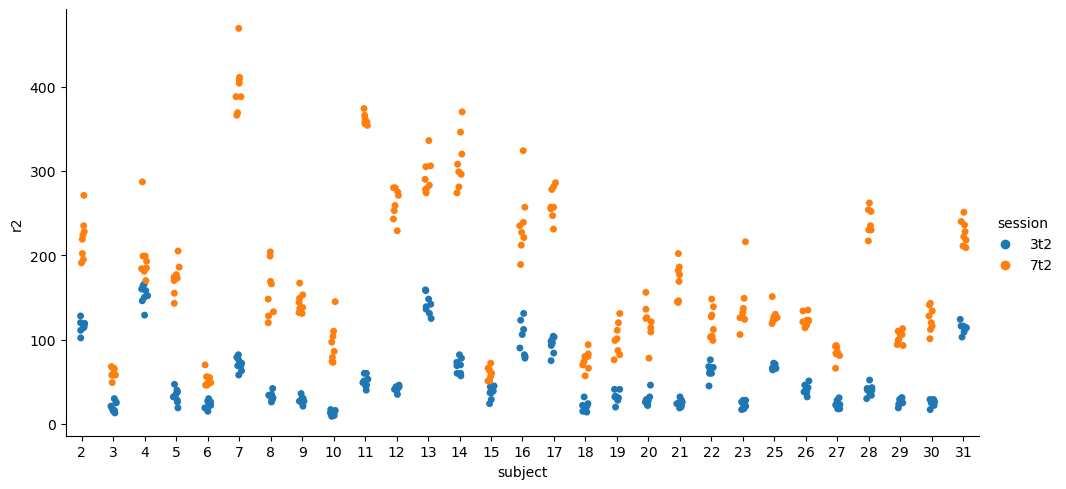

In [7]:
sns.catplot(x='subject', y='r2', hue='session', data=sum_0, aspect=2.)

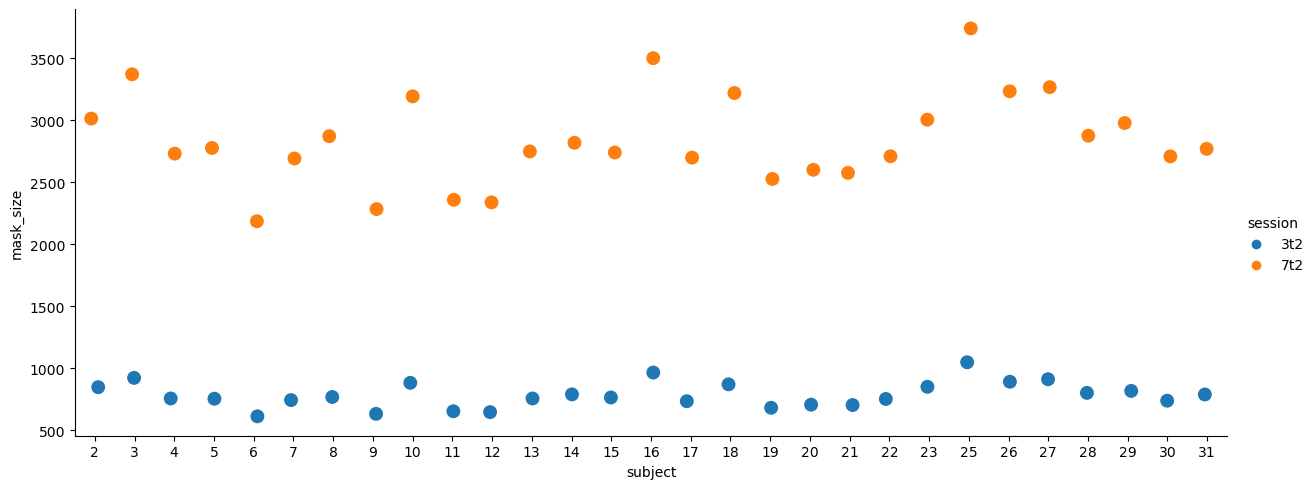

In [8]:
mask_size = df.groupby(['subject', 'session', 'voxel']).mean().groupby(['subject', 'session']).size()

sns.catplot(x='subject', y='mask_size', hue='session', data=mask_size.to_frame('mask_size'), aspect=2.5, size=10)

In [9]:
mask_size

subject  session
2        3t2         848
         7t2        3014
3        3t2         923
         7t2        3371
4        3t2         757
         7t2        2731
5        3t2         755
         7t2        2777
6        3t2         613
         7t2        2186
7        3t2         744
         7t2        2692
8        3t2         769
         7t2        2872
9        3t2         633
         7t2        2284
10       3t2         883
         7t2        3193
11       3t2         654
         7t2        2359
12       3t2         647
         7t2        2338
13       3t2         757
         7t2        2749
14       3t2         790
         7t2        2819
15       3t2         765
         7t2        2740
16       3t2         966
         7t2        3501
17       3t2         735
         7t2        2699
18       3t2         871
         7t2        3220
19       3t2         682
         7t2        2527
20       3t2         707
         7t2        2601
21       3t2         704
        